<div style="background-color: #ccffcc; padding: 10px;">
    <h1> Tutorial 2 </h1> 
    <h2> Physics Informed Neural Networks Part 2</h2>
    <h2> 1D Heat Equation PINNs Equation Example </h2>
</div>    

# Overview

This notebook is based on two papers: *[Physics-Informed Neural Networks:  A Deep LearningFramework for Solving Forward and Inverse ProblemsInvolving Nonlinear Partial Differential Equations](https://www.sciencedirect.com/science/article/pii/S0021999118307125)* and *[Hidden Physics Models:  Machine Learning of NonlinearPartial Differential Equations](https://www.sciencedirect.com/science/article/pii/S0021999117309014)* with the help of  Fergus Shone and Michael Macraild.

These tutorials will go through solving Partial Differential Equations using Physics Informed Neuaral Networks focusing on the 1D Heat Equation and a more complex example using the Navier Stokes Equation

**This introduction section is replicated in all PINN tutorial notebooks (please skip if you've already been through)** 

<div style="background-color: #cce5ff; padding: 10px;">

If you have not already then in your gitbash or terminal please run the following code in the LIFD_ENV_ML_NOTEBOOKS directory via the terminal(mac or linux)  or git bash (windows) 
    
```bash
git submodule init
git submodule update --init --recursive
```

**If this does not work please clone the [PINNs](https://github.com/maziarraissi/PINNs) repository into your Physics_Informed_Neural_Networks folder**

    
</div>

<div style="background-color: #ccffcc; padding: 10px;">

<h1>Physics Informed Neural Networks</h1>

For a typical Neural Network using algorithims like gradient descent to look for a hypothesis, data is the only guide, however if the data is noisy or sparse and we already have governing physical models we can use the knowledge we already know to optamize and inform the algoithms. This can be done via [feature enginnering]() or by adding a physicall inconsistency term to the loss function.
<a href="https://towardsdatascience.com/physics-guided-neural-networks-pgnns-8fe9dbad9414">
<img src="https://miro.medium.com/max/700/1*uM2Qh4PFQLWLLI_KHbgaVw.png">
</a>   
  
 
## The very basics

If you know nothing about neural networks there is a [toy neural network python code example](https://github.com/cemac/LIFD_ENV_ML_NOTEBOOKS/tree/main/ToyNeuralNetwork) included in the [LIFD ENV ML Notebooks Repository]( https://github.com/cemac/LIFD_ENV_ML_NOTEBOOKS). Creating a 2 layer neural network to illustrate the fundamentals of how Neural Networks work and the equivlent code using the python machine learning library [tensorflow](https://keras.io/). 

    
## Recommended reading 
    
The in-depth theory behind neural networks will not be covered here as this tutorial is focusing on application of machine learning methods. If you wish to learn more here are some great starting points.   

* [All you need to know on Neural networks](https://towardsdatascience.com/nns-aynk-c34efe37f15a) 
* [Introduction to Neural Networks](https://victorzhou.com/blog/intro-to-neural-networks/)
* [Physics Guided Neural Networks](https://towardsdatascience.com/physics-guided-neural-networks-pgnns-8fe9dbad9414)
* [Maziar Rassi's Physics informed GitHub web Page](https://maziarraissi.github.io/PINNs/)

</div>


<hr>


<div style="background-color: #e6ccff; padding: 10px;">
    
<h1> Machine Learning Theory </h1>
<a href="https://victorzhou.com/series/neural-networks-from-scratch/">
<img src="https://victorzhou.com/media/nn-series/network.svg">
</a>

    
## Physics informed Neural Networks

Neural networks work by using lots of data to calculate weights and biases from data alone to minimise the loss function enabling them to act as universal fuction approximators. However these loose their robustness when data is limited. However by using know physical laws or empirical validated relationships the solutions from neural networks can be sufficiently constrianed by disregardins no realistic solutions.
    
A Physics Informed Nueral Network considers a parameterized and nonlinear partial differential equation in the genral form;

\begin{align}
u_t + \mathcal{N}[u; \lambda]  = 0,  x \in \Omega, t \in [0,T],\\
\end{align}


where $\mathcal{u(t,x)}$ denores the hidden solution, $\mathcal{N}$ is a nonlinear differential operator acting on $u$, $\mathcal{\lambda}$ and $\Omega$ is a subset of $\mathbb{R}^D$ (the perscribed data). This set up an encapuslate a wide range of problems such as diffusion processes, conservation laws,  advection-diffusion-reaction  systems,  and  kinetic  equations and conservation laws. 

Here we will go though this for the 1D headt equation and Navier stokes equations


</div>    

<div style="background-color: #cce5ff; padding: 10px;">

<h1> Python </h1>

    
## Tensorflow 
    
There are many machine learning python libraries available, [TensorFlow](https://www.tensorflow.org/) a is one such library. If you have GPUs on the machine you are using TensorFlow will automatically use them and run the code even faster!

## Further Reading

* [Running Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/running.html#running)
* [Tensorflow optimizers](https://www.tutorialspoint.com/tensorflow/tensorflow_optimizers.htm)

</div>
    
<hr>

<div style="background-color: #ffffcc; padding: 10px;">
    
<h1> Requirements </h1>

These notebooks should run with the following requirements satisfied

<h2> Python Packages: </h2>

* Python 3
* tensorflow > 2
* numpy 
* matplotlib
* scipy

<h2> Data Requirements</h2>
    
This notebook referes to some data included in the git hub repositroy
    
</div>


**Contents:**

1. [1D Heat Equation Non ML Example](PINNs_1DHeatEquations_nonML.ipynb)
2. **[1D Heat Equation PINN Example](PINNs_1DEquationExample.ipynb)**
    * [1D Heat Equation Forwards](#1D-Heat-Equation-Forwards)
    * [1D Heat Equation Inverse](#1D-Heat-Equation-Inverse)
3. [Navier-Stokes PINNs discovery of PDE’s](PINNs_NavierStokes_example.ipynb)
4. [Navier-Stokes PINNs Hidden Fluid Mechanics](PINNs_NavierStokes_HFM.ipynb)



<div style="background-color: #cce5ff; padding: 10px;">
Load in all required modules (includig some auxillary code) and turn off warnings. 
</div>

In [1]:
# For readability: disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
import time
sys.path.insert(0, 'PINNs/Utilities/')
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
import time
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from time import time
import scipy.sparse as sp
import scipy.sparse.linalg as la
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "pyDOE"])
from pyDOE import lhs

<hr>

# Solving 1D heat equations via Neural Networks

# 1D Heat Equation Forwards

<div style="background-color: #ccffcc; padding: 10px;">

**Model Problem: 1D Heat Equation**

We begin by describing the first model problem - the one-dimensional heat equation. 

The heat equation is the prototypical parabolic partial differential equation and can be applied to modelling the diffusion of heat through a given region, hence its name. Read more about the heat equation here: https://en.wikipedia.org/wiki/Heat_equation.

In 1D, the heat equation can be written as:

\begin{equation}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2 },
\end{equation}
    
where $k$ is a material parameter called the coefficient of thermal diffusivitiy.

This equation can be solved using numerical methods, such as finite differences or finite elements. For this notebook, we have solved the above equation numerically on a domain of $x \in [0,1]$ and $t \in [0, 0.25]$. Solving this equation numerically gives us a spatiomtemporal domain $(x,t)$ and corresponding values of the solution $u$.

</div>
    
<div style="background-color: #e6ccff; padding: 10px;">

    
Here we will describe the architecture of the PINN we use to solve the 1D heat equation in this notebook. 
![PINNS.png](PINNS.png)
    
    
Net U in the above diagram approximations a function that maps from $(x,t) \mapsto u$. $\sigma$ represents the biases and weights for the each neuron of the network. These $\sigma$ values are the network parameters that are updated after each iteration. AD means Automatic Differentiation - this is the chain rule-based differentiation procedure that allows for differentiation of network outputs with respect to its inputs, e.g. differenting $u$ with respect to $x$, or calculating $\frac{\partial u}{\partial x}$. The I node in the AD section represents the identity operation, i.e. keeping $u$ fixed without applying any differentiation. 

After the automatic differentiation part of the network, we have two separate loss function components - the data loss and the PDE loss. The data loss term is calculated by finding the difference between the network outputs/predictions $u$ and the ground truth values of $u$, which could come from simulation or experiment. The data loss term enforces the network outputs to match known data points, which are represented by the pink box labelled "Data". The PDE loss term is where we add the "physics-informed" part of the network. Using automatic differentiation, we are able to calculate derivatives of our network outputs, and so we are able to construct a loss function that enforces the network to match the PDE that is known to govern the system. In this case, the PDE loss term is defined as:
 
\begin{equation}
f = \frac{\partial u}{\partial t} - k \frac{\partial^2 u}{\partial x^2 },
\end{equation}
    
where f is the residual of the 1D heat equation. By demanding that $f$ is minimised as our network train, we ensure that the network outputs obey the underlying PDE that governs the system. We then calculate the total loss of the system as a sum of the data loss and the PDE loss.

The loss is calculated after each pass through the network and when it is above a certain tolerance, the weights and biases are updated using a gradient descent step. When the loss falls below the tolerance the network is trained. In inference mode, we can then input a fine mesh of spatiomteporal coordinates and the network will find the solution at each of these points.
    
</div>

<hr>
<div style="background-color: #ccffcc; padding: 10px;">

**$u(x,t)$** can then be defined below as the function `net_u` and the physics informed neural network **$f(x,t)$** is outline in function `net_f`

`neural_net()` constructs the network U where X is a matrix containing the input and output coordinates, i.e. x,t,u
and X is normalised so that all values lie between -1 and 1, this improves training

`net_u()` constructs a network that takes input x,t and outputs the solution u    
    
`net_f()`  the f network is where the PDE is encoded:
    
1. we read in the value of k first so that it can be included in the equations 
2. then we evaluate u for the X_f input coordinates (collocation points)
3. then we use tensorflow differentiation to calculate the derivatives of the solution
4. finally we encode the PDE in residual form, as f->0, u_t = k*u_xx, which is the governing eq
    
</div>

In [53]:
def neural_net(X, weights, biases, lb, ub):
    num_layers = len(weights) + 1

    H = 2.0*(X - lb)/(ub - lb) - 1.0
    for l in range(0,num_layers-2):
        W = weights[l]
        b = biases[l]
        H = torch.tanh(torch.add(torch.matmul(H, W), b))
    W = weights[-1]
    b = biases[-1]
    Y = torch.add(torch.matmul(H, W), b)
    return Y

def net_u(x_tf, t_tf, model, lb, ub):  
    X = torch.cat([x_tf, t_tf], 1)
    X = X.float()
    u = model(X)
    return u

def net_f(x_tf, t_tf, model, lb, ub, k):  
    X = torch.cat([x_tf, t_tf], 1)
    X = X.float()
    u = model(X)
    
    u_t = torch.autograd.grad(u.sum(), t_tf, create_graph=True)[0]
    u_x = torch.autograd.grad(u.sum(), x_tf, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x.sum(), x_tf, create_graph=True)[0]
    
    f = u_t - k * u_xx
    
    return f


<hr>
<div style="background-color: #ccffcc; padding: 10px;">
    
###  Intialise everying 
    
the `init` function will take our gridded data X and U initialised it building our neural networks from the functions defined above ready to train the model

Variables to be deffined here:

`X_u`: Input coordinates, e.g. spatial and temporal coordinates.

`u`: Output corresponding to each input coordinate. 

`X_f`: Collocation points at which the governing equations are satisfied. These coordinates will have the same format as the X_u coordinates, e.g. $(x,t)$.

layers: Specifies the structure of the u network.

`lb`: Vector containing the lower bound of all of the coordinate variables, e.g. $x_{min}$, $t_{min}$.

`ub`: Vector containing the upper bound of all of the coordinate variables, e.g. $x_{max}$, $t_{max}$.

`k`: This is the constant material parameter for this specific problem. For this problem, the heat equation, $k$ represents thermal diffusivity.
    

    
</div>

<div style="background-color: #cce5ff; padding: 10px;">

# Advanced 
    
    
Once you have run through the notebook once you may wish to alter the optamizer used in the `init()` function to see the large effect optamizer choice may have. 
    
We've highlighted in the comments a number of possible optamizers to use from the [tf.compat.v1.train](https://www.tensorflow.org/api_docs/python/tf/compat/v1/train) module. 
*This method was chosen to limit tensorflow version modifications required from the original source code*
    
You can learn more about different optamizers [here](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)
    
</div>

# init

In [59]:
class NeuralNet(nn.Module):
    def __init__(self, layers):
        super(NeuralNet, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(layers, layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

def init(layers):
    model = NeuralNet(layers)
    return model

def train(model, X, u, layers, lb, ub, k, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    x = X[:,0:1]
    t = X[:,1:2]
    
    x_tf = torch.tensor(x, requires_grad=True)
    t_tf = torch.tensor(t, requires_grad=True)
    u_tf = torch.tensor(u, requires_grad=True)
    
    u_pred = net_u(x_tf, t_tf, model, lb, ub)
    f_pred = net_f(x_tf, t_tf, model, lb, ub, k)
    
    loss_PDE = criterion(f_pred, torch.zeros(f_pred.shape))
    loss_data = criterion(u_tf, u_pred)
    loss = loss_PDE + 5*loss_data
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return model, loss, optimizer

<div style="background-color: #ccffcc; padding: 10px;">

# Load data and set input parameters 
      
A feedforward neural network of the following structure is assumed:
- the input is scaled elementwise to lie in the interval $[-1, 1]$,
- followed by 8 fully connected layers each containing 20 neurons and each followed by a hyperbolic tangent activation function,
- one fully connected output layer.

This setting results in a network with a first hidden layer: $2 \cdot 20 + 20 = 60$; $9$ intermediate layers: each $20 \cdot 20 + 20 = 540$; output layer: $20 \cdot 1 + 1 = 21$).
    

</div>

 <div style="background-color: #cce5ff; padding: 10px;">
    
# Number of collocation points 
    
`2000` colloction points is the default setting for this example this can be increased to improve results at cost of computational speed. The original work set this `N_u=10000` running on GPU's in a few minutes. 
    
    
The network takes in data in coordinate pairs: $(x,t) \mapsto u$.     
</div>

<div style="background-color: #cce5ff; padding: 10px;">

Once you have run through the notebook once you may wish to alter any the following 
    
- number of data training points `N_u`
- number of collocation training points `N_f`
- number of layers in the network `layers`
- number of neurons per layer `layers`

</div>

In [55]:
k = 1
N_u = 100 #100 # number of data points
N_f = 2000 # Coloaction points 
# structure of network: two inputs (x,t) and one output u
# 8 fully connected layers with 20 nodes per layer
layers = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

In [56]:
data = scipy.io.loadmat("Data/heatEquation_data.mat")
t = data['t'].flatten()[:,None] # read in t and flatten into column vector
x = data['x'].flatten()[:,None] # read in x and flatten into column vector
 # Exact represents the exact solution to the problem, from the Matlab script provided
Exact = np.real(data['usol']).T # Exact has structure of nx times nt


print("usol shape = ", Exact.shape)

# We need to find all the x,t coordinate pairs in the domain
X, T = np.meshgrid(x,t)

# Flatten the coordinate grid into pairs of x,t coordinates
X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None])) # coordinates x,t
u_star = Exact.flatten()[:,None]   # corresponding solution value with each coordinate            


print("X has shape ", X.shape, ", X_star has shape ", X_star.shape)
    
# Doman bounds (-1,1)
lb = X_star.min(0)
ub = X_star.max(0)  

print("Lower bounds of x,t: ", lb)
print("Upper bounds of x,t: ", ub)

## train using internal points
X_u_train = X_star
u_train = u_star

## Generate collocation points using Latin Hypercube sampling within the bounds of the spationtemporal coordinates
# Generate N_f x,t coordinates within range of upper and lower bounds
X_f_train = lb + (ub-lb)*lhs(2, N_f) # the 2 denotes the number of coordinates we have - x,t 

## In addition, we add the X_u_train coordinats from the boundaries to the X_f coordinate set
X_f_train = np.vstack((X_f_train, X_u_train)) # stack up all training x,t coordinates for u and f 

## We downsample the boundary data to leave N_u randomly distributed points
## This makes the training more difficult - 
## if we used all the points then there is not much for the network to do!
idx = np.random.choice(X_star.shape[0], N_u, replace=False)
X_u_train = X_star[idx,:]
u_train = u_star[idx,:]


usol shape =  (51, 101)
X has shape  (51, 101) , X_star has shape  (5151, 2)
Lower bounds of x,t:  [0. 0.]
Upper bounds of x,t:  [1.   0.25]


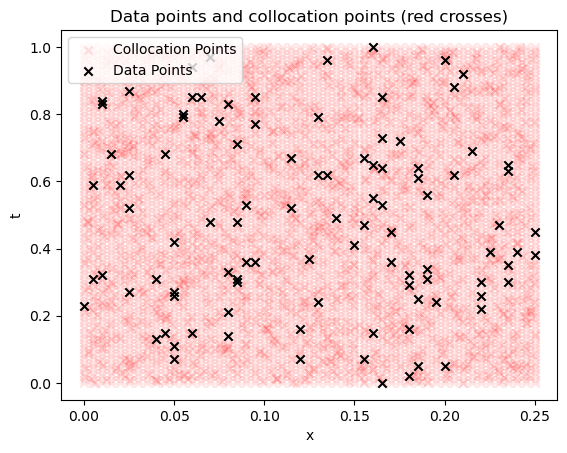

In [57]:
## making a plot to show the distribution of training data
plt.scatter(X_f_train[:,1], X_f_train[:,0], marker='x', color='red',alpha=0.1)
plt.scatter(X_u_train[:,1], X_u_train[:,0], marker='x', color='black')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Data points and collocation points (red crosses)')
plt.legend(['Collocation Points', 'Data Points'])
plt.show()

<div style="background-color: #ccffcc; padding: 10px;">

# Initalise the neural network 
    
`init` is called passing in the training data `X_u_train` and `u_train` with information about the neural network layers and bounds `lb` `ub`
    
# Extract vars
    
`init` reformats some of the data and outputs model features that we need to pass into the training function `train`

</div>

In [72]:
model = init(layers)


x = X_u_train[:,0:1]
t = X_u_train[:,1:2]

x_tf = torch.tensor(x, requires_grad=True)
t_tf = torch.tensor(t, requires_grad=True)
u_tf = torch.tensor(u_train, requires_grad=True)

u_pred = net_u(x_tf, t_tf, model, lb, ub)
f_pred = net_f(x_tf, t_tf, model, lb, ub, k)
model = model.float()
x_tf = x_tf.float()
t_tf = t_tf.float()
u_tf = u_tf.float()
#x = x.float()
#t = t.float()
#u_train = u_train.float()

# Now you can call your train function
model, loss, optimizer = train(model, Train_iterations, x_tf, t_tf, u_tf, x, t, u_train)

It: 0, Loss: 1.572e+00, Time: 0.00
It: 50, Loss: 2.918e-01, Time: 0.11
It: 100, Loss: 1.477e-01, Time: 0.10
It: 150, Loss: 5.015e-02, Time: 0.11
It: 200, Loss: 3.186e-02, Time: 0.11
It: 250, Loss: 2.637e-02, Time: 0.10
It: 300, Loss: 2.308e-02, Time: 0.10
It: 350, Loss: 2.045e-02, Time: 0.11
It: 400, Loss: 1.873e-02, Time: 0.10
It: 450, Loss: 1.671e-02, Time: 0.11
It: 500, Loss: 1.553e-02, Time: 0.10
It: 550, Loss: 1.482e-02, Time: 0.11
It: 600, Loss: 1.495e-02, Time: 0.11
It: 650, Loss: 1.429e-02, Time: 0.11
It: 700, Loss: 1.414e-02, Time: 0.10
It: 750, Loss: 1.402e-02, Time: 0.11
It: 800, Loss: 1.578e-02, Time: 0.11
It: 850, Loss: 1.384e-02, Time: 0.11
It: 900, Loss: 1.374e-02, Time: 0.11
It: 950, Loss: 1.365e-02, Time: 0.11
It: 1000, Loss: 1.356e-02, Time: 0.11
It: 1050, Loss: 1.347e-02, Time: 0.10
It: 1100, Loss: 1.572e-02, Time: 0.10
It: 1150, Loss: 1.333e-02, Time: 0.11
It: 1200, Loss: 1.326e-02, Time: 0.11
It: 1250, Loss: 1.319e-02, Time: 0.11
It: 1300, Loss: 1.312e-02, Time: 0.

In [66]:
import time

In [67]:

def train(model, nIter, x_tf, t_tf, u_tf, x, t, u_train, learning_rate=0.001): 
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    start_time = time.time()
    for it in range(nIter):
        optimizer.zero_grad()

        u_pred = net_u(x_tf, t_tf, model, lb, ub)
        f_pred = net_f(x_tf, t_tf, model, lb, ub, k)

        loss_PDE = criterion(f_pred, torch.zeros(f_pred.shape))
        loss_data = criterion(u_tf, u_pred)
        loss = loss_PDE + 5*loss_data

        loss.backward()
        optimizer.step()

        # Print
        if it % 50 == 0:
            elapsed = time.time() - start_time
            print('It: %d, Loss: %.3e, Time: %.2f' % 
                (it, loss.item(), elapsed))
            start_time = time.time()

    return model, loss, optimizer



<div style="background-color: #cce5ff; padding: 10px;">

**Training might take a while depending on value of Train_iterations**

If you set Train_iterations too low the end results will be garbage. 50000 was used to achieve excellent results. 

* If you are using a machine with GPUs please set `Train_iterations` to 50000 and this will run quickly
* If you are using a well spec'ed laptop/computer and can leave this setting `Train_iterations=50000` but it will take upto 10 mins
* If you are using a low spec'ed laptop/computer or cannont leave the code running `Train_iterations=20000` is the reccomended value (this solution may not be accurate)
    
</div>

In [68]:
# Training
Train_iterations=50000

In [69]:
train(model, Train_iterations, x_tf, t_tf, u_tf, x, t, u_train)

RuntimeError: Found dtype Float but expected Double

<div style="background-color: #ccffcc; padding: 10px;">

# Use trained model to predict from data sample
    
`predict` will predict `u` using the trained model

</div>

In [73]:
def predict(model, x_star, t_star):
    x_star_tf = torch.tensor(x_star, requires_grad=True)
    t_star_tf = torch.tensor(t_star, requires_grad=True)

    u_star = net_u(x_star_tf, t_star_tf, model, lb, ub)
    f_star = net_f(x_star_tf, t_star_tf, model, lb, ub, k)

    return u_star.detach().numpy(), f_star.detach().numpy()

In [75]:
u_pred, f_pred = predict(model,X_star[:,0:1],X_star[:,1:2])

error_u = np.linalg.norm(u_star-u_pred,2)/np.linalg.norm(u_star,2)

<div style="background-color: #ccffcc; padding: 10px;">

# Calculate Errors
    
if you have set the number of training iterations large enough the errors should be small. 
</div>

In [76]:
print("f_pred mean = ", np.mean(f_pred))
print('Error u: %e' % (error_u))
print('Percent error u: ',  100*error_u)


f_pred mean =  0.008793788491523171
Error u: 4.476623e-02
Percent error u:  4.476622613423611


In [77]:
# Set grid values back to full data set size for plotting

t = data['t'].flatten()[:,None]
x = data['x'].flatten()[:,None]
X, T = np.meshgrid(x,t) 


U_pred = griddata(X_star, u_pred.flatten(), (X,T), method='cubic')
Error = np.abs(Exact - U_pred)
percentError = 100*np.divide(Error, Exact)

<div style="background-color: #ccffcc; padding: 10px;">

# Plot Exact and Precticed $(u,t)$
    


</div>

--------- Errors ---------
Percent error u:  4.476622613423611
--------------------------


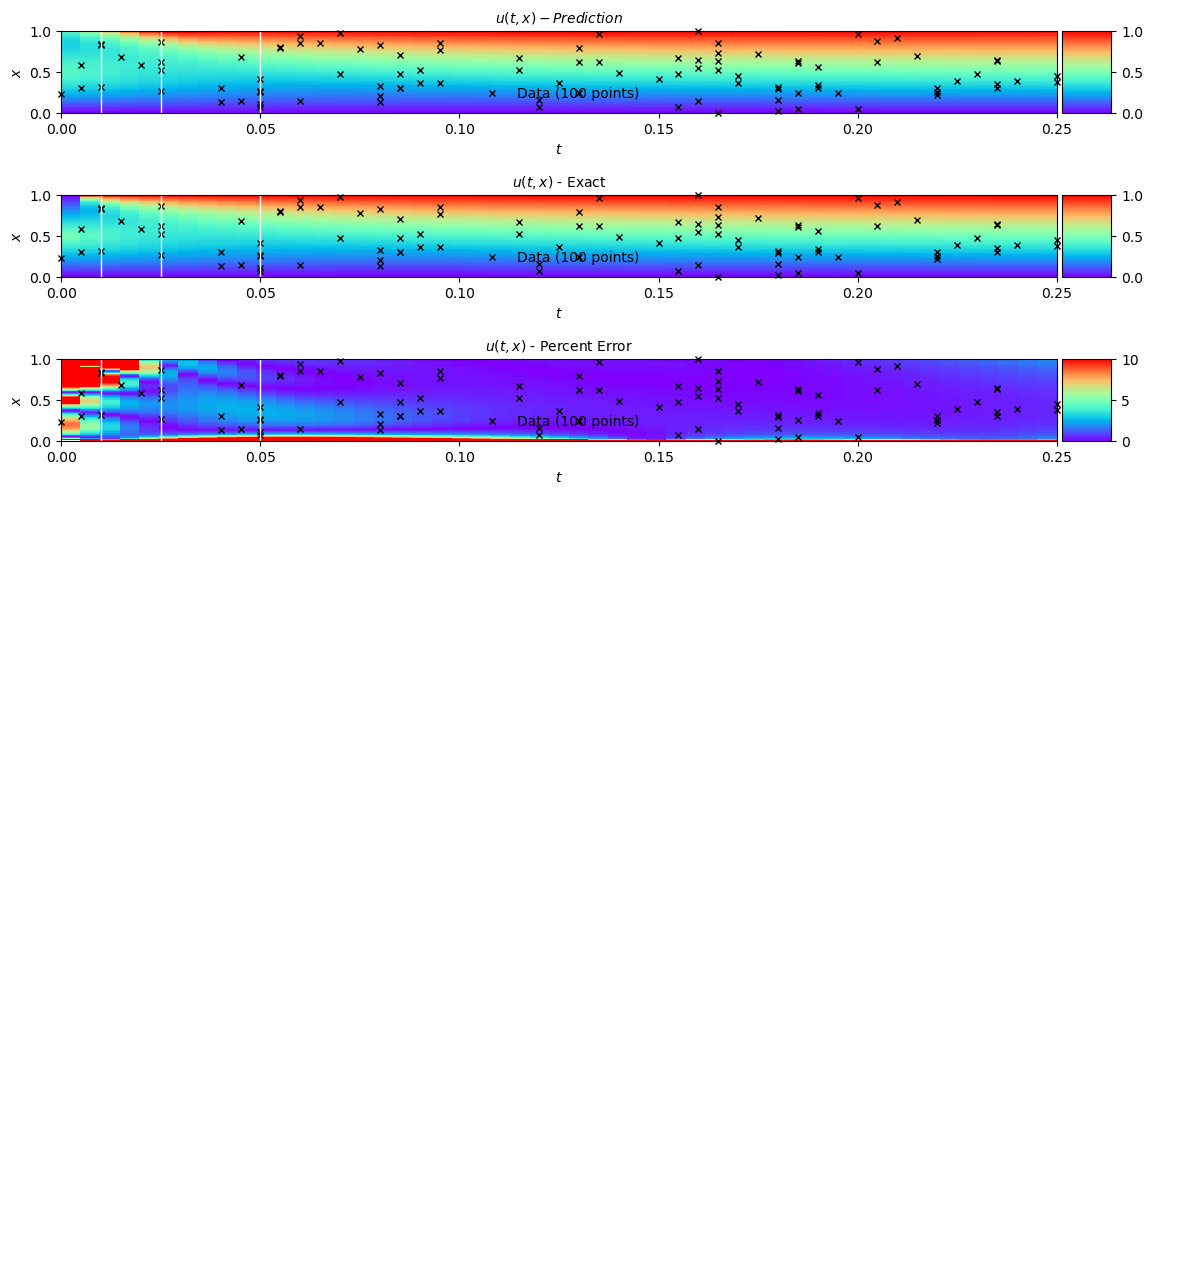

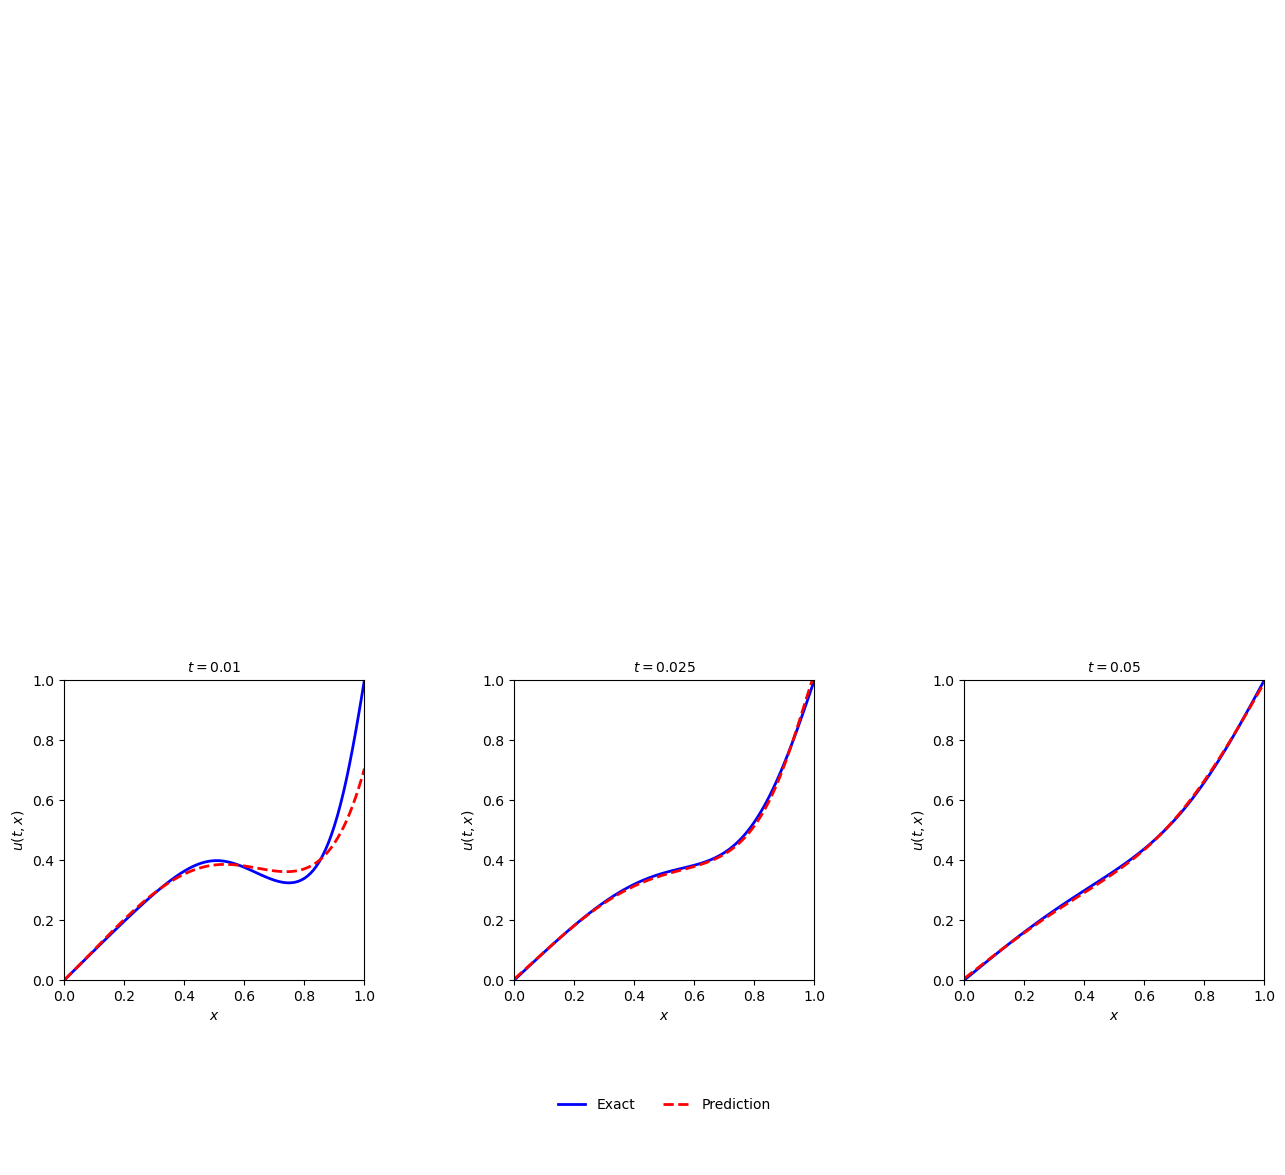

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')

print("--------- Errors ---------")
print('Percent error u: ',  100*error_u)
print("--------------------------")


####### Row 0: u(t,x) ##################
gs0 = gridspec.GridSpec(3, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0, hspace=1)


########## Prediction ##################
ax = plt.subplot(gs0[0, :])
h = ax.imshow(U_pred.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x) - Prediction$', fontsize = 10)

########## Exact ##################
ax = plt.subplot(gs0[1, :])
i = ax.imshow(Exact.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(i, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x)$ - Exact', fontsize = 10)

########## Error ##################
ax = plt.subplot(gs0[2, :])
j = ax.imshow(percentError.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 10)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(j, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x)$ - Percent Error', fontsize = 10)

####### Row 1: u(t,x) slices ##################

fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
gs1 = gridspec.GridSpec(1, 3)
gs1.update(top=1-1/3, bottom=0, left=0.1, right=0.9, wspace=0.5)

ax = plt.subplot(gs1[:, 0])
ax.plot(x,Exact[2,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[2,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.set_title('$t = ' + str(t[2,0]) + '$', fontsize = 10)
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax = plt.subplot(gs1[:, 1])
ax.plot(x,Exact[5,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[5,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('$t = ' + str(t[5,0]) + '$', fontsize = 10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5, frameon=False)

ax = plt.subplot(gs1[:, 2])
ax.plot(x,Exact[10,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[10,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('$t = ' + str(t[10,0]) + '$', fontsize = 10);




<div style="background-color: #ccffcc; padding: 10px;">

**Results**

Above are the results of the PINN. The error for recreating the full solution field is $\approx 10 \%$, despite using only $N_u = 100$ data points. This shows the power of PINNs to learn from sparse measurements by augmanting the available observational data with knowledge of the underlying physics (i.e. governing equations). 

The three colourmaps show the PINN prediction, the exact solution from the numerical method and the relative error between these two fields. We can see that the errors are largest near $t=0$ and $x=0$, but that overall the agreement is very good.

On the colourmap, we can see three vertical white lines, which show the location in time of the three profile plots of $u$ against $x$. The three heat profiles at these times are plotted against the exact solution found using numerical methods. The profiles can be seen to be in very good agreement, but show worse agreement.

**Further Work**

Congratulations, you have now trained your first physics-informed neural network!

This network contains a number of hyper-parameters that could be tuned to give better results. Various hyper-parameters include:
- number of data training points N_u
- number of collocation training points N_f
- number of layers in the network
- number of neurons per layer
- weightings for the data and PDE loss terms in the loss function (currently we use loss = loss_PDE + 5*loss_data)

It is also possible to use different sampling techniques for training data points. We randomly select $N_u$ data points, but alternative methods could be choosing only boundary points or choosing more points near the $t=0$ boundary. Choosing boundary points for training could help to reduce the errors seen in these regions.

Feel free to try out some of these changes if you like!

There are 3 subsequent PINNs notebooks to follow, which look at the inverse heat equation problem and two Navier-Stokes fluid flow problems. 

</div>

# 1D Heat Equation Inverse

<div style="background-color: #ccffcc; padding: 10px;">

Remembering that in 1D, the heat equation can be written as:

\begin{equation}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2 }
\end{equation}

where $k$ is a material parameter called the coefficient of thermal diffusivitiy. For this notebook, we have solved the above equation numerically on a domain of $x \in [0,1]$ and $t \in [0, 0.25]$. Solving this equation numerically gives us a spatiomtemporal domain $(x,t)$ and corresponding values of the solution $u$.

**Now we will let $k$ be an unknown input parameter in the PINN**. In reality, we know the value of $k$, as we set it when solving the system numerically, but for the sake of this example let's imagine we do not know the value of $k$ when we come to use the PINN. This corresponds to real-world problems where we may have observational data, knowledge of the governing equations, but little information for some input parameters for the system.

The network architecture for this example is the same as for the previous [example](#1D-Heat-Equation-Forwards). The only difference is that this time we do not know the value for $k$, and so in each training iteration we do not only updates the network weights and biases, but also the value of $k$. Through training, the network will then optimise the value of $k$ such that it fits with the observed data.
    
</div>


In [ ]:
## this is the k value used to generate the data
## we use this to compare to the value found by the PINN
k_exact = 1

<div style="background-color: #cce5ff; padding: 10px;">

Once you have run through the notebook once you may wish to alter any the following 
    
- number of data training points `N_u`
- number of collocation training points `N_f`
- number of layers in the network `layers`
- number of neurons per layer `layers`

</div>

In [ ]:
N_u = 100 #100 # number of data points
N_f = 2000 # Coloaction points 
# structure of network: two inputs (x,t) and one output u
# 8 fully connected layers with 20 nodes per layer
layers = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

In [ ]:
# This code duplicated from above incase you have been playing with parameters
data = scipy.io.loadmat("Data/heatEquation_data.mat")
t = data['t'].flatten()[:,None] # read in t and flatten into column vector
x = data['x'].flatten()[:,None] # read in x and flatten into column vector
 # Exact represents the exact solution to the problem, from the Matlab script provided
Exact = np.real(data['usol']).T # Exact has structure of nx times nt


# print("t = ", t.transpose())
# print("x = ", x.transpose())
print("usol shape = ", Exact.shape)

# We need to find all the x,t coordinate pairs in the domain
X, T = np.meshgrid(x,t)

# Flatten the coordinate grid into pairs of x,t coordinates
X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None])) # coordinates x,t
u_star = Exact.flatten()[:,None]   # corresponding solution value with each coordinate            


print("X has shape ", X.shape, ", X_star has shape ", X_star.shape)
    
# Doman bounds (-1,1)
lb = X_star.min(0)
ub = X_star.max(0)  

print("Lower bounds of x,t: ", lb)
print("Upper bounds of x,t: ", ub)

## train using internal points
X_u_train = X_star
u_train = u_star

## Generate collocation points using Latin Hypercube sampling within the bounds of the spationtemporal coordinates
# Generate N_f x,t coordinates within range of upper and lower bounds
X_f_train = lb + (ub-lb)*lhs(2, N_f) # the 2 denotes the number of coordinates we have - x,t 

## In addition, we add the X_u_train coordinats from the boundaries to the X_f coordinate set
X_f_train = np.vstack((X_f_train, X_u_train)) # stack up all training x,t coordinates for u and f 

## We downsample the boundary data to leave N_u randomly distributed points
## This makes the training more difficult - 
## if we used all the points then there is not much for the network to do!
idx = np.random.choice(X_star.shape[0], N_u, replace=False)
X_u_train = X_star[idx,:]
u_train = u_star[idx,:]

<div style="background-color: #ccffcc; padding: 10px;">

now we will use all the same fuctions as before except we will modify `k` and the train function to handle a changing `k` value    
    
</div>

In [ ]:
# k as tensorflow variable with inital value set
k = tf.Variable([1.0], dtype=tf.float32)
xvars, NNvars, tfvars, preds, optvars = init(X_u_train, u_train, layers, lb, ub,k)
X, lb, ub, x, t, u = xvars
layers, weights, biases = NNvars
sess, x_tf, t_tf ,u_tf = tfvars
u_pred, f_pred,=preds
loss, optimizer,optimizer_Adam,train_op_Adam = optvars

In [ ]:
def train(sess, nIter,x_tf, t_tf, u_tf,x, t,u_train, loss, train_op_Adam, optimizer_Adam): 
    tf_dict = {x_tf: x,  t_tf: t, u_tf: u}

    start_time = time()
    for it in range(nIter):
        sess.run(train_op_Adam, tf_dict)

        # Print
        if it % 50 == 0:
            elapsed = time() - start_time
            loss_value = sess.run(loss, tf_dict)
            k_value = self.sess.run(self.k)
            print('It: %d, Loss: %.3e, k: %.3f, Time: %.2f' % 
                          (it, loss_value, k_value, elapsed))
            start_time = time.time()

    optimizer_Adam.minimize(loss)

<div style="background-color: #cce5ff; padding: 10px;">

**Training might take a while depending on value of Train_iterations**

If you set Train_iterations too low the end results will be garbage. 50000 was used to achieve excellent results. 

* If you are using a machine with GPUs please set `Train_iterations` to 50000 and this will run quickly
* If you are using a well spec'ed laptop/computer and can leave this setting `Train_iterations=50000` but it will take upto 10 mins
* If you are using a low spec'ed laptop/computer or cannont leave the code running `Train_iterations=20000` is the reccomended value (this solution may not be accurate)
    
</div>

In [ ]:
# Training
Train_iterations=50000
train(sess, Train_iterations,x_tf, t_tf, u_tf,x, t,u_train, loss, train_op_Adam, optimizer_Adam)

In [ ]:
u_pred, f_pred=preds
u_pred, f_pred = predict(sess, X_star[:,0:1], X_star[:,1:2], u_pred, f_pred)

error_u = np.linalg.norm(u_star - u_pred, 2)/np.linalg.norm(u_star, 2)

In [ ]:
print("f_pred mean = ", np.mean(f_pred))
print('Error u: %e' % (error_u))
print('Percent error u: ',  100*error_u)


In [ ]:
# Set grid values back to full data set size for plotting

t = data['t'].flatten()[:,None]
x = data['x'].flatten()[:,None]
X, T = np.meshgrid(x,t) 


U_pred = griddata(X_star, u_pred.flatten(), (X,T), method='cubic')
Error = np.abs(Exact - U_pred)
percentError = 100*np.divide(Error, Exact)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')

print("--------- Errors ---------")
print('Percent error u: ',  100*error_u)
print("--------------------------")


####### Row 0: u(t,x) ##################
gs0 = gridspec.GridSpec(3, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0, hspace=1)


########## Prediction ##################
ax = plt.subplot(gs0[0, :])
h = ax.imshow(U_pred.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x) - Prediction$', fontsize = 10)

########## Exact ##################
ax = plt.subplot(gs0[1, :])
i = ax.imshow(Exact.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(i, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x)$ - Exact', fontsize = 10)

########## Error ##################
ax = plt.subplot(gs0[2, :])
j = ax.imshow(percentError.T, interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto', vmin = 0, vmax = 10)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(j, cax=cax)

ax.plot(X_u_train[:,1], X_u_train[:,0], 'kx', label = 'Data (%d points)' % (u_train.shape[0]), markersize = 4, clip_on = False)

line = np.linspace(x.min(), x.max(), 2)[:,None]
ax.plot(t[2]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[5]*np.ones((2,1)), line, 'w-', linewidth = 1)
ax.plot(t[10]*np.ones((2,1)), line, 'w-', linewidth = 1)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('$u(t,x)$ - Percent Error', fontsize = 10)

####### Row 1: u(t,x) slices ##################

fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
gs1 = gridspec.GridSpec(1, 3)
gs1.update(top=1-1/3, bottom=0, left=0.1, right=0.9, wspace=0.5)

ax = plt.subplot(gs1[:, 0])
ax.plot(x,Exact[2,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[2,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.set_title('$t = ' + str(t[2,0]) + '$', fontsize = 10)
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax = plt.subplot(gs1[:, 1])
ax.plot(x,Exact[5,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[5,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('$t = ' + str(t[5,0]) + '$', fontsize = 10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5, frameon=False)

ax = plt.subplot(gs1[:, 2])
ax.plot(x,Exact[10,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x,U_pred[10,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(t,x)$')
ax.axis('square')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('$t = ' + str(t[10,0]) + '$', fontsize = 10);

<div style="background-color: #ccffcc; padding: 10px;">

**Results**

Above are the results of the PINN. The error for recreating the full solution field is $\approx 5 \%$, despite using only $N_u = 100$ data points. This shows the power of PINNs to learn solution fields from sparse measurements, even when some of the input parameters are unknown.

The three colourmaps show the PINN prediction, the exact solution from the numerical method and the relative error between these two fields. We can see that the errors are largest near $t=0$ and $x=0$, but that overall the agreement is very good.

On the colourmap, we can see three vertical white lines, which show the location in time of the three profile plots of $u$ against $x$. The three heat profiles at these times are plotted against the exact solution found using numerical methods. The profiles can be seen to be in very good agreement, but show worse agreement.

**Further Work**

Congratulations, you have now trained your second physics-informed neural network!

This network contains a number of hyper-parameters that could be tuned to give better results. Various hyper-parameters include:
- number of data training points N_u
- number of collocation training points N_f
- number of layers in the network
- number of neurons per layer
- weightings for the data and PDE loss terms in the loss function (currently we use loss = loss_PDE + 5*loss_data)
- initialisation value for k
- optimisation 

It is also possible to use different sampling techniques for training data points. We randomly select $N_u$ data points, but alternative methods could be choosing only boundary points or choosing more points near the $t=0$ boundary.

return [here](#1D-Heat-Equation) to try out some of these changes if you like, or [here](#init) to alter optimization method used
 
    
 </div>

<hr>


<div style="background-color: #e6ccff; padding: 10px;">
    
# Next Steps
    
    
Next we move on to a more complex example using the Navier Stokes Equation in the notebook linked below
  
[Navier-Stokes PINNs discovery of PDE’s](PINNs_NavierStokes_example.ipynb)
    
 <hr>

**Contact Details** 

For any questions, corrections or comments, please contact either:

Michael MacRaild - scmm@leeds.ac.uk

Fergus Shone - mm16f2s@leeds.ac.uk
    
</div>